In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from tifffile import imsave

### Determine the experiment

In [2]:
experiment = '20220509_SHC_on_glass_Epi488'
positive   = 'positive/AVG_positive/positive_collection.tif'
negative   = 'negative/AVG_negative/negative.tif'

### Read and show the images

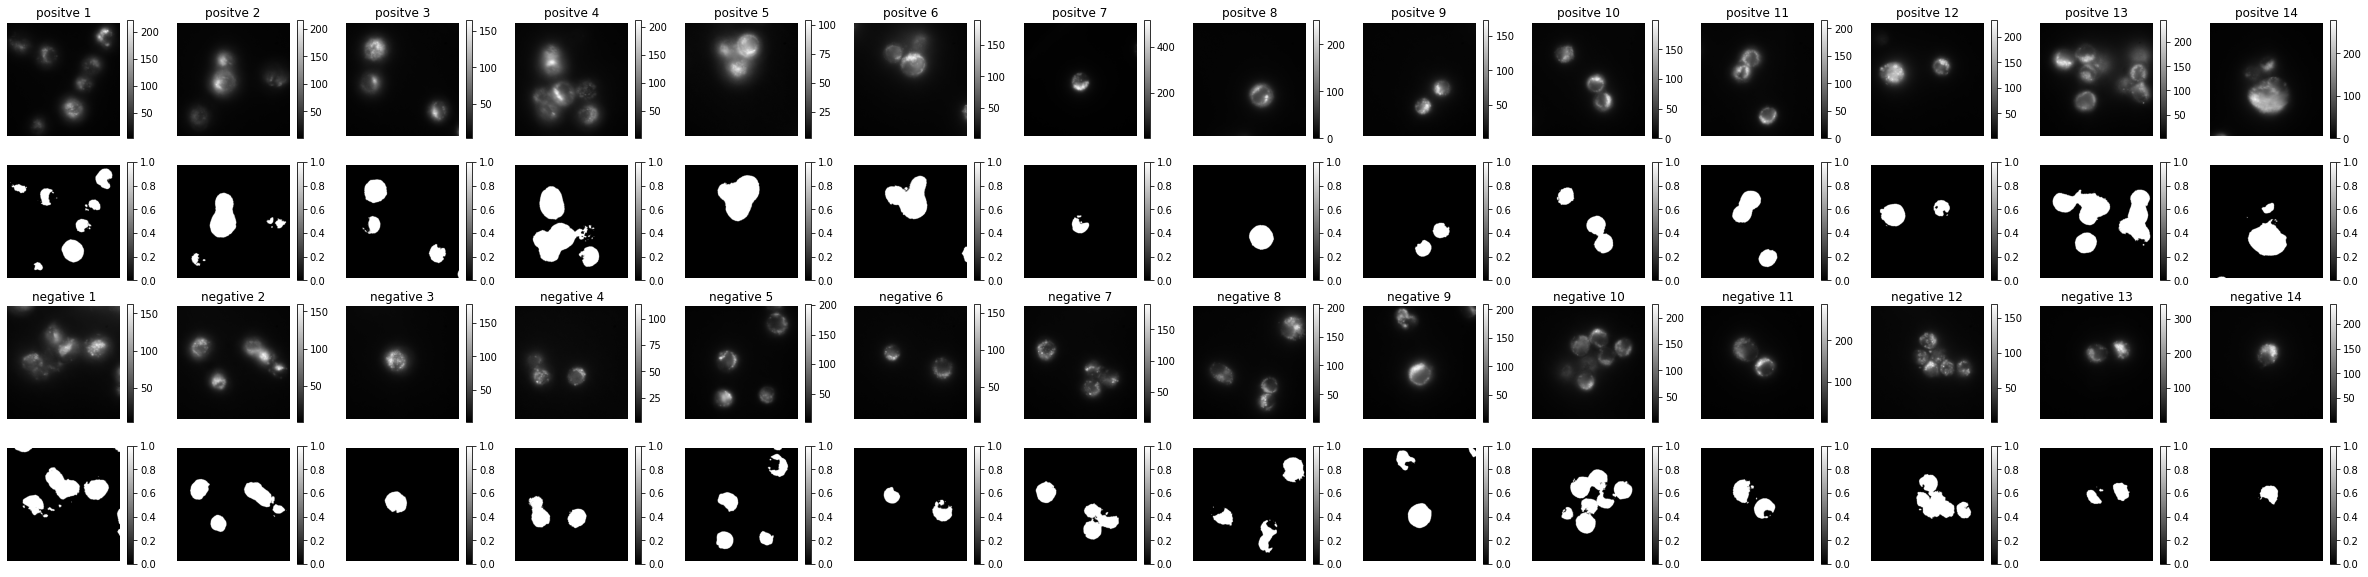

In [3]:
# Read all the images in each directory
epi_positive = io.imread(f'Data/{experiment}/{positive}')
epi_negative = io.imread(f'Data/{experiment}/{negative}')

# Subtract the base line
base_line = np.min([epi_positive.min(), epi_negative.min()])
epi_positive -= base_line
epi_negative -= base_line

# Save the stackes in tiff format
imsave(f'Data/{experiment}/positve.tif', epi_positive)
imsave(f'Data/{experiment}/negative.tif', epi_negative)

# Extract the segmented signals
signal_positive = np.array([img * (img > filters.threshold_otsu(img)) for img in epi_positive])
signal_negative = np.array([img * (img > filters.threshold_otsu(img)) for img in epi_negative])

# Plot all the images
plt.figure(figsize=(3*epi_positive.shape[0], 10))

for i, img in enumerate(epi_positive):
    plt.subplot(4, epi_positive.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'positve {i+1}')
    plt.colorbar()
    
for i, img in enumerate(epi_positive):
    plt.subplot(4, epi_positive.shape[0], i+1+epi_positive.shape[0])
    plt.imshow(img > filters.threshold_otsu(img), cmap='gray')
    plt.axis('off')
    plt.colorbar()
    
for i, img in enumerate(epi_negative):
    plt.subplot(4, epi_positive.shape[0], i+1+2*epi_positive.shape[0])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'negative {i+1}')
    plt.colorbar()
    
for i, img in enumerate(epi_negative):
    plt.subplot(4, epi_positive.shape[0], i+1+3*epi_positive.shape[0])
    plt.imshow(img > filters.threshold_otsu(img), cmap='gray')
    plt.axis('off')
    plt.colorbar()

plt.savefig(f'Data/{experiment}/summary')
plt.show()

### Compare the results in a histograme

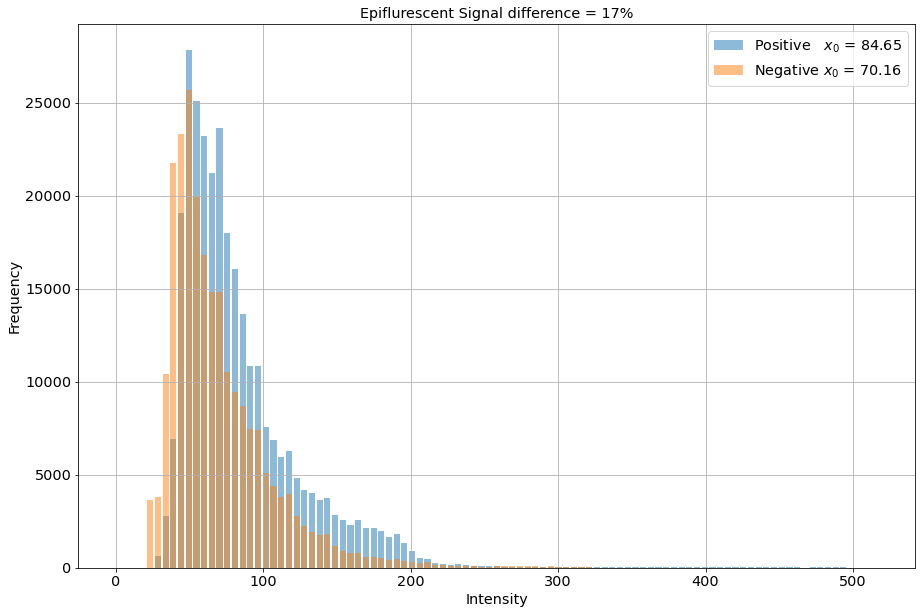

In [4]:
# Flat the array and exclud the zero
signal_positive = signal_positive[signal_positive != 0].ravel()
signal_negative = signal_negative[signal_negative != 0].ravel()

# plot a comparison of the two histogram
plt.figure(figsize=(15,10))
plt.hist(signal_positive, bins=np.linspace(0, signal_positive.max(), 100), rwidth=0.8, label=f'Positive   $x_0$ = {signal_positive.mean():.2f}', alpha=0.5)
plt.hist(signal_negative, bins=np.linspace(0, signal_positive.max(), 100), rwidth=0.8, label=f'Negative $x_0$ = {signal_negative.mean():.2f}', alpha=0.5)
plt.title(f'Epiflurescent Signal difference = {((signal_positive.mean() - signal_negative.mean())/ signal_positive.mean())*100:.0f}%', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.grid()

plt.savefig(f'Data/{experiment}/comparison')
plt.show()

### Compare the results in a logarithmic histograme

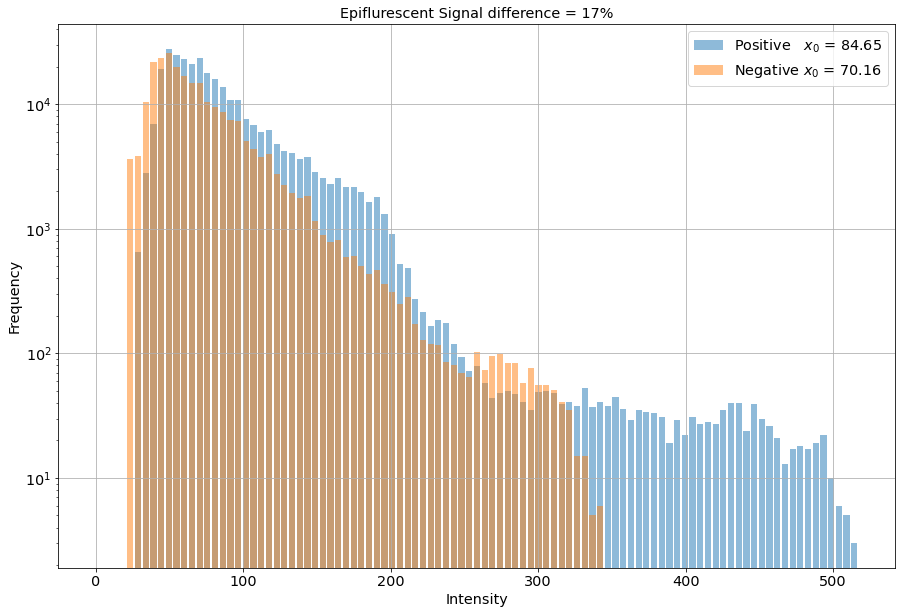

In [5]:
# plot a comparison of the two histogram
plt.figure(figsize=(15,10))
plt.hist(signal_positive, bins=np.linspace(0, signal_positive.max(), 100), rwidth=0.8, label=f'Positive   $x_0$ = {signal_positive.mean():.2f}', alpha=0.5)
plt.hist(signal_negative, bins=np.linspace(0, signal_positive.max(), 100), rwidth=0.8, label=f'Negative $x_0$ = {signal_negative.mean():.2f}', alpha=0.5)
plt.title(f'Epiflurescent Signal difference = {((signal_positive.mean() - signal_negative.mean())/ signal_positive.mean())*100:.0f}%', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.yscale('log')
plt.legend(fontsize='x-large')
plt.grid()

plt.savefig(f'Data/{experiment}/comparison_log')
plt.show()